In [74]:
#Configuring Environemnt
!pip install wbdata
!pip install cufflinks
import wbdata
import cufflinks as cf #for plotting 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PART I Data Visualisation (#c)

In [75]:
adol_fert_rate = wbdata.get_dataframe({"SP.ADO.TFRT":"adolesecnt_fertiliy_rate"}, country = "SSA")


In [76]:
pop_rate = wbdata.get_dataframe({"SP.POP.GROW":"pop_growth_rate"}, country = "SSA")
pop = wbdata.get_dataframe({"SP.POP.TOTL": "population"}, country = "SSA")
pop_rate["adol_fert_rate_per women"] = adol_fert_rate ["adolesecnt_fertiliy_rate"]/1000
# pop_rate["fert_rate"] = fert_rate["fertiliy_rate"]
pop_rate["log_pop"] = np.log(pop["population"])
pop_rate = pop_rate.dropna()

In [77]:
after = pop_rate["adol_fert_rate_per women"][:59].tolist()
before = pop_rate["adol_fert_rate_per women"][1:].tolist()
gap = []
for i in range(len(after)):
    gap += [-(after[i] - before[i])/before[i]]


In [78]:
pop_rate.drop(index=pop_rate.index[-1],axis=0,inplace=True)

In [79]:
pop_rate["adolescent fertility decline rate"] = gap

In [80]:
pop_rate.index = pop_rate.index.astype("int")

In [81]:
conditions = [
    (pop_rate.index <= 1970),
    (pop_rate.index >= 1971) & (pop_rate.index <= 1980),
    (pop_rate.index >= 1981) & (pop_rate.index <= 1990),
    (pop_rate.index >= 1991) & (pop_rate.index <= 2000),
    (pop_rate.index >= 2001) & (pop_rate.index <= 2010),
    (pop_rate.index >= 2011) & (pop_rate.index <= 2021)
]
choices = ["60","70","80","90","00","10"]
pop_rate["decade"] = np.select(conditions, choices, default=0)
pop_rate

,pop_growth_rate,adol_fert_rate_per women,log_pop,adolescent fertility decline rate,decade
date,,,,,
2020,2.653009,0.098020,20.864074,0.016819,10
2019,2.668134,0.099696,20.837889,0.016496,10
2018,2.680774,0.101369,20.811558,0.016113,10
2017,2.676302,0.103029,20.785103,0.017344,10
2016,2.722169,0.104847,20.758692,0.016799,10
2015,2.770503,0.106639,20.731834,0.016524,10
2014,2.765269,0.108430,20.704506,0.015973,10
2013,2.772816,0.110190,20.677229,0.015546,10
2012,2.769938,0.111930,20.649878,0.013294,10


Part A Population Statistics 

Text(0, 0.5, '%')

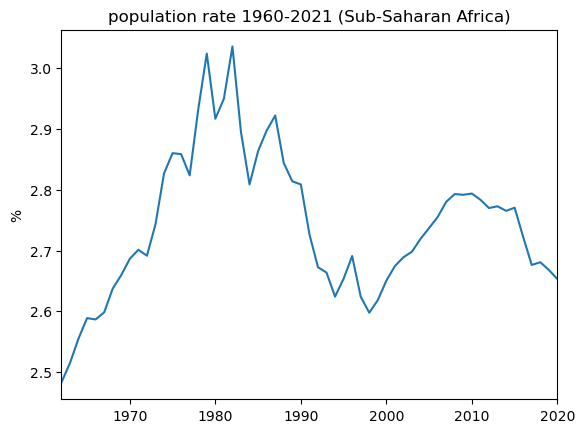

In [99]:
plt.plot(pop_rate.index, pop_rate.iloc[:,0])
plt.title("population rate 1960-2021 (Sub-Saharan Africa)")
plt.xlim(min(pop_rate.index), max(pop_rate.index))
plt.ylabel("%")

Text(0, 0.5, 'per women (15-19)')

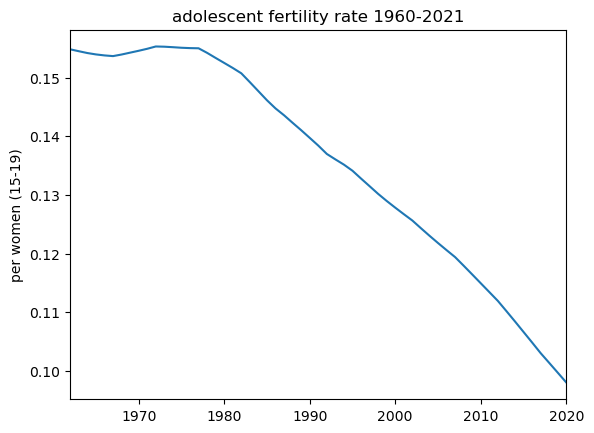

In [85]:
plt.plot(pop_rate.index, pop_rate.iloc[:,1])
plt.title("adolescent fertility rate 1960-2021")
plt.xlim(min(pop_rate.index), max(pop_rate.index))
plt.ylabel("per women (15-19)")

Text(0, 0.5, 'per woman')

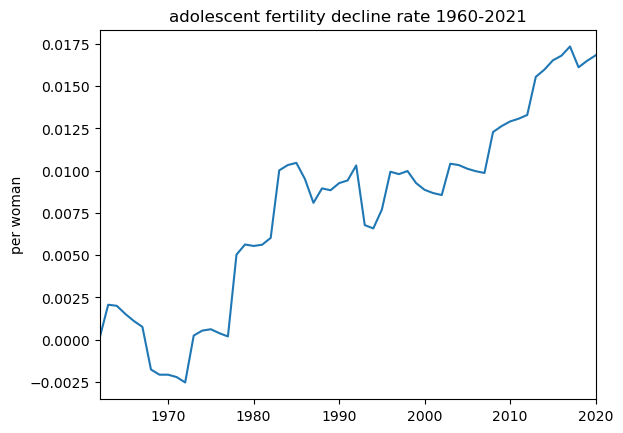

In [86]:
plt.plot(pop_rate.index, pop_rate.iloc[:,3])
plt.title("adolescent fertility decline rate 1960-2021")
plt.xlim(min(pop_rate.index), max(pop_rate.index))
plt.ylabel("per woman")

/tmp/ipykernel_48/1142280956.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(-0.005, 0, '-0.50%'),
 Text(-0.0025, 0, '-0.25%'),
 Text(0.0, 0, '0.00%'),
 Text(0.0024999999999999996, 0, '0.25%'),
 Text(0.005, 0, '0.50%'),
 Text(0.007500000000000001, 0, '0.75%'),
 Text(0.009999999999999998, 0, '1.00%'),
 Text(0.0125, 0, '1.25%'),
 Text(0.015, 0, '1.50%'),
 Text(0.017499999999999998, 0, '1.75%'),
 Text(0.02, 0, '2.00%')]

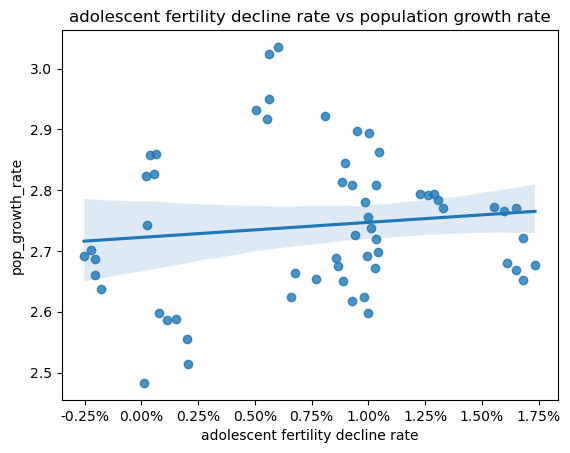

In [87]:
import seaborn as sns

g =sns.regplot(data=pop_rate, x="adolescent fertility decline rate", y="pop_growth_rate")
plt.title("adolescent fertility decline rate vs population growth rate")
xlables = ['{0:.2f}%'.format(x) for x in g.get_xticks()*100]
g.set_xticklabels(xlables)

/tmp/ipykernel_48/2685812363.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



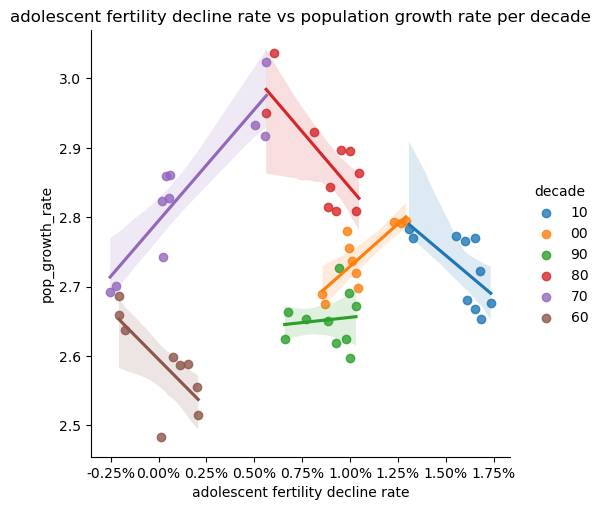

In [88]:
import seaborn as sns
g = sns.lmplot(data=pop_rate, x="adolescent fertility decline rate", y="pop_growth_rate", hue = "decade")
plt.title("adolescent fertility decline rate vs population growth rate per decade")
for ax in g.axes.flat:
    labels = ax.get_xticks()
    new_labels = ['{0:.2f}%'.format(x) for x in labels*100]
    ax.set_xticklabels(new_labels)
    


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'linear regression: adolescent fertility rate vs population  ')

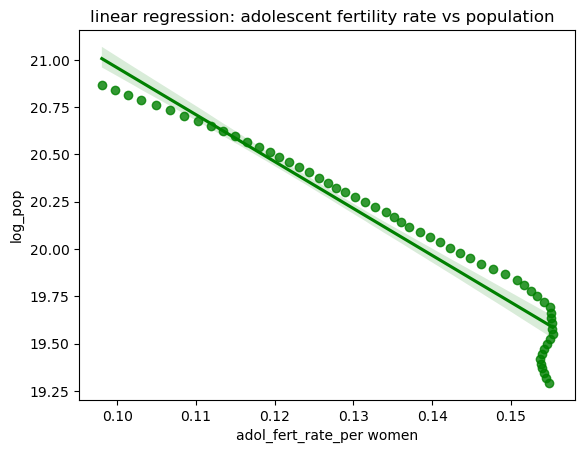

In [89]:
sns.regplot(pop_rate.iloc[:,1],pop_rate.iloc[:,2], color = "green")
plt.title("linear regression: adolescent fertility rate vs population  ")


Text(0.5, 1.0, 'adolescent fertility rate vs population per decade')

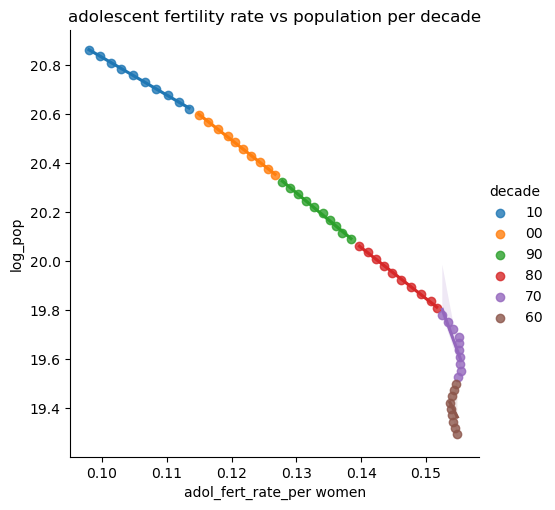

In [90]:
import seaborn as sns
sns.lmplot(data=pop_rate, x="adol_fert_rate_per women", y="log_pop", hue = "decade")
plt.title("adolescent fertility rate vs population per decade")

PART II Population Dataframe & Statistics (#A)

In [91]:
#A population statistics
def population(year, sex, age, country):
#Function population takes in "year" as an integer; 
#"sex" as a string, female for "FE", male for "MA", all for "TOTAL"
#"age" as a list [lower_range, higher_range]
# due to limitation of the dataset, there is only a limited number of age ranges accepted 
# including : [00,04],[00,14],[05,09],[10,14],[15,19],[15,64],[20-24],[25,29],[30,34],[35,39] ... [75,79],[80,UP]
# "country" as a string of id of the country, for example, "SSF" for Sub-Saharan Africa
    low_age = age[0]
    high_age = age[1]
    if sex == "TOTAL":
      id_1 = "SP.POP." + str(low_age) + str(high_age)+ ".FE"
      id_2 = "SP.POP." + str(low_age) + str(high_age)+ ".MA"
      pop_female = wbdata.get_dataframe({id_1:"female_pop"}, country).loc[str(year)]["female_pop"]
      pop_male = wbdata.get_dataframe({id_2:"male_pop"}, country).loc[str(year)]["male_pop"]
      return pop_female + pop_male
    else: 
      id = "SP.POP." + str(low_age) + str(high_age)+ "." + sex
      pop = wbdata.get_dataframe({id:"pop"}, country).loc[str(year)]["pop"]
      return pop
#Example: in year 2010, return the number of females aged 15-19 living in sub-saharan Africa
population(2010,"FE",[15,19],"SSF")

46626624.0

In [92]:
#Example: in year 2010, return the number of females aged 15-19 living in sub-saharan Africa
population(2010,"TOTAL",[80,"UP"],"SSF")

3351751.0

In [93]:
#filter out ids of age-sex groups ids from wbdata source 40's indicators 
pop_id_df = pd.DataFrame(wbdata.get_indicator(source = 40))
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        ):
#     print(pop_id_df)
# our ids of interest are from row 33 to row 118
ids_dic = wbdata.get_indicator(source = 40)[33:119]
ids = []
for dic in ids_dic:
  ids += [dic["id"]]
age_sex_groups_female = list(filter(lambda x: len(x) ==14 and x[13] == "E", ids))
age_sex_groups_male = list(filter(lambda x: len(x) ==14 and x[13] == "A", ids))
age_sex_groups = age_sex_groups_male + age_sex_groups_female

In [94]:
#Helper function : convert ids to readable names
def id_to_column_name(id):
  age = id[7:11]
  sex = id[12:]
  if sex == "MA":
    col_name = "male " + str(age[0:2]) + "-" + str(age[2:])
  else: 
    col_name = "female " + str(age[0:2]) + " - " + str(age[2:])
  return col_name
id_to_column_name('SP.POP.80UP.MA')

'male 80-UP'

In [95]:
#A Population DataFrames 
def pop_df():
  pop_df = wbdata.get_dataframe({age_sex_groups[0]:id_to_column_name(age_sex_groups[0])})
  for id in age_sex_groups[1:]:
    new_df = wbdata.get_dataframe({id:id_to_column_name(id)})
    pop_df = pd.concat([pop_df,new_df], axis =1)
  return pop_df
#example the age-sex groups population counts per year in USA
world_pop_df = pop_df()
world_pop_df



male 00-04  male 05-09  male 10-14  \
country                     date                                       
Africa Eastern and Southern 2021  54474934.0  48590005.0  43631748.0   
                            2020  53461851.0  47709312.0  42575598.0   
                            2019  52445829.0  46830488.0  41476275.0   
                            2018  51462324.0  45959995.0  40339961.0   
                            2017  50527950.0  45048010.0  39194652.0   
...                                      ...         ...         ...   
Zimbabwe                    1964    420478.0    341840.0    290292.0   
                            1963    408091.0    331804.0    275716.0   
                            1962    396134.0    322256.0    257087.0   
                            1961    384620.0    313170.0    240574.0   
                            1960    373573.0    304532.0    225437.0   

                                  male 15-19  male 20-24  male 25-29  \
country                     date                                       
Africa Eastern and Southern 2021  37645093.0  32077598.0  27554198.0   
                            2020  36563052.0  31250943.0  26824252.0   
                            2019  35526881.0  30439607.0  26157013.0   
                            2018  34553287.0  29672727.0  25565705.0   
                            2017  33610378.0  28956812.0  25005637.0   
...                                      ...         ...         ...   
Zimbabwe                    1964    206569.0    173359.0    136845.0   
                            1963    199628.0    167583.0    133018.0   
                            1962    197236.0    161750.0    129724.0   
                            1961    193069.0    156305.0    126809.0   
                            1960    187879.0    151326.0    124166.0   

                                  male 30-34  male 35-39  male 40-44  \
country                     date                                       
Africa Eastern and Southern 2021  23787250.0  19836395.0  15770587.0   
                            2020  23186536.0  19161081.0  15076634.0   
                            2019  22540445.0  18485600.0  14415738.0   
                            2018  21859093.0  17803395.0  13828439.0   
                            2017  21167835.0  17103010.0  13331062.0   
...                                      ...         ...         ...   
Zimbabwe                    1964    113207.0     96367.0     79754.0   
                            1963    111553.0     93470.0     80309.0   
                            1962    110086.0     90350.0     81382.0   
                            1961    108396.0     87864.0     81913.0   
                            1960    106266.0     86458.0     81256.0   

                                  male 45-49  ...  female 35 - 39  \
country                     date              ...                   
Africa Eastern and Southern 2021  12307798.0  ...      20373836.0   
                            2020  11954285.0  ...      19607075.0   
                            2019  11620415.0  ...      18847517.0   
                            2018  11294381.0  ...      18101141.0   
                            2017  10961721.0  ...      17350716.0   
...                                      ...  ...             ...   
Zimbabwe                    1964     73593.0  ...        103374.0   
                            1963     71013.0  ...         99845.0   
                            1962     67716.0  ...         96033.0   
                            1961     64543.0  ...         92892.0   
                            1960     62021.0  ...         90906.0   

                                  female 40 - 44  female 45 - 49  \
country                     date                                   
Africa Eastern and Southern 2021      16114329.0      12840580.0   
                            2020      15395913.0      12524773.0   
                            2019      14730960.0     

In [96]:
SSA_pop = world_pop_df.loc['Sub-Saharan Africa (excluding high income)']
SSA_pop

,male 00-04,male 05-09,male 10-14,male 15-19,male 20-24,male 25-29,male 30-34,male 35-39,male 40-44,male 45-49,...,female 35 - 39,female 40 - 44,female 45 - 49,female 50 - 54,female 55 - 59,female 60 - 64,female 65 - 69,female 70 - 74,female 75 - 79,female 80 - UP
date,,,,,,,,,,,,,,,,,,,,,
2021,93610818.0,83227228.0,74225310.0,63691873.0,53641060.0,45571275.0,39041806.0,33006341.0,26793901.0,20973827.0,...,33459186.0,27125432.0,21571700.0,17809252.0,14331731.0,11138680.0,8290597.0,5670739.0,3492721.0,2808182.0
2020,91951162.0,81719240.0,72352095.0,61798371.0,52119264.0,44348841.0,38071164.0,32031618.0,25729211.0,20283197.0,...,32404721.0,26038733.0,20925209.0,17295999.0,13898383.0,10799836.0,8061676.0,5520572.0,3394143.0,2759860.0
2019,90299665.0,80187607.0,70419983.0,59966005.0,50666311.0,43214628.0,37085643.0,31042215.0,24686974.0,19622690.0,...,31341644.0,24994582.0,20327485.0,16773690.0,13456661.0,10454970.0,7792582.0,5362967.0,3281354.0,2682332.0
2018,88695198.0,78626241.0,68447750.0,58204744.0,49329996.0,42181051.0,36104135.0,30026233.0,23713902.0,18990000.0,...,30271473.0,24035515.0,19768241.0,16254733.0,13015513.0,10115556.0,7505221.0,5200231.0,3168639.0,2594365.0
2017,87161166.0,76965222.0,66476562.0,56481749.0,48083095.0,41190254.0,35125620.0,28973087.0,22830918.0,18371595.0,...,29177445.0,23180975.0,19223629.0,15749548.0,12583497.0,9796901.0,7244373.0,5026129.0,3065025.0,2508403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,22800235.0,17505906.0,14586224.0,12550784.0,10649301.0,9101956.0,7858907.0,6747863.0,5721238.0,4743479.0,...,6855147.0,5766746.0,4803539.0,3959443.0,3222421.0,2529717.0,1869727.0,1229168.0,694637.0,450563.0
1963,22149448.0,16998201.0,14153351.0,12300941.0,10370376.0,8911041.0,7706794.0,6617206.0,5608405.0,4639376.0,...,6700871.0,5641039.0,4691191.0,3871841.0,3149536.0,2475304.0,1827347.0,1199056.0,680346.0,439847.0
1962,21513894.0,16515671.0,13790373.0,12004993.0,10122227.0,8727883.0,7558767.0,6489810.0,5495995.0,4538739.0,...,6552944.0,5516473.0,4584214.0,3788000.0,3079065.0,2423986.0,1784957.0,1170625.0,667014.0,429417.0
